<ipython-input-12-692d529d19f6>:50: RuntimeWarning: invalid value encountered in double_scalars
  B[i,j] = b_numerator[i,j] / b_denominator[i,j]
<ipython-input-12-692d529d19f6>:50: RuntimeWarning: invalid value encountered in double_scalars
  B[i,j] = b_numerator[i,j] / b_denominator[i,j]
<ipython-input-12-692d529d19f6>:50: RuntimeWarning: invalid value encountered in double_scalars
  B[i,j] = b_numerator[i,j] / b_denominator[i,j]


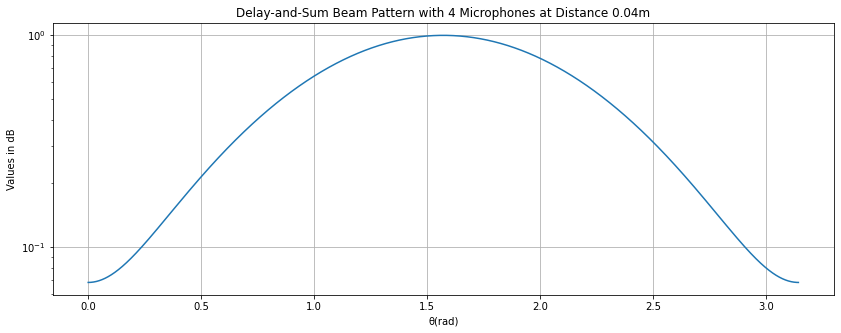

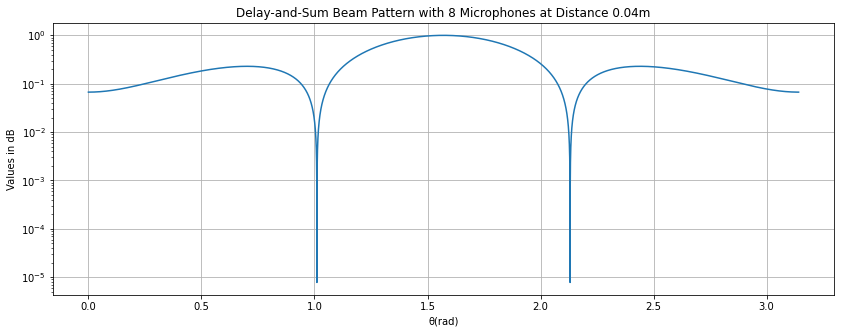

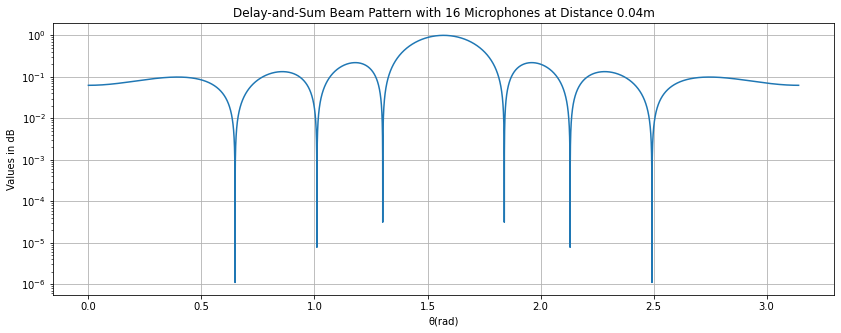

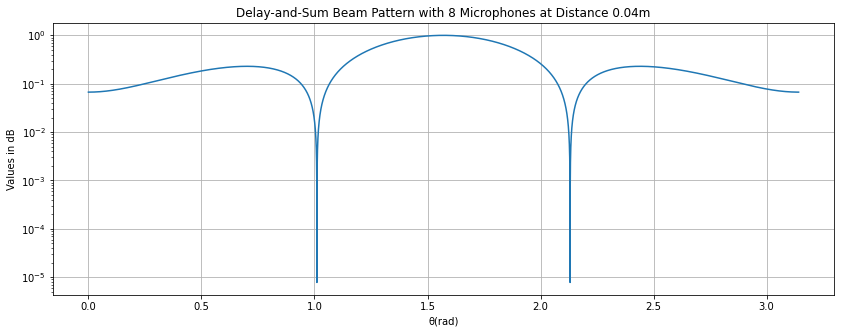

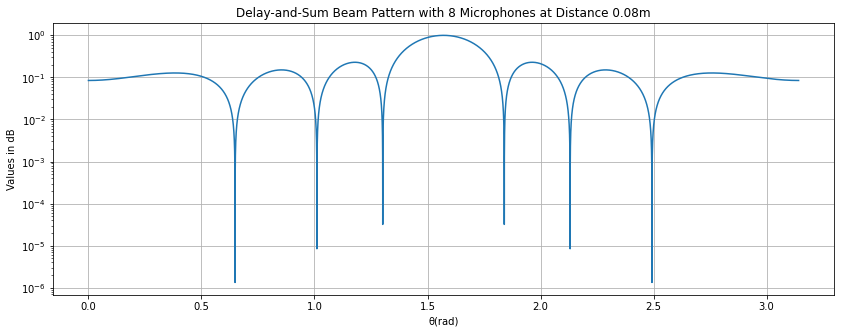

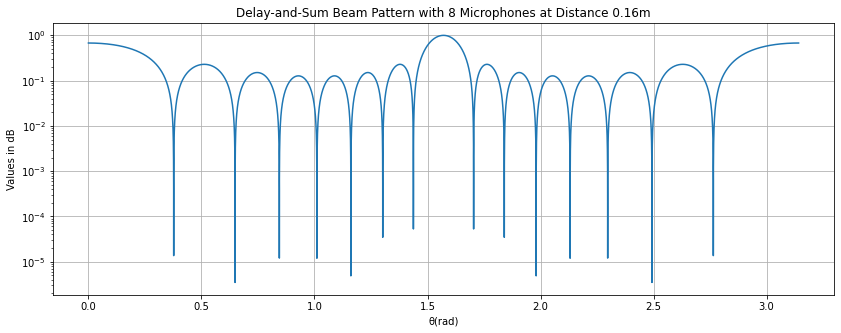

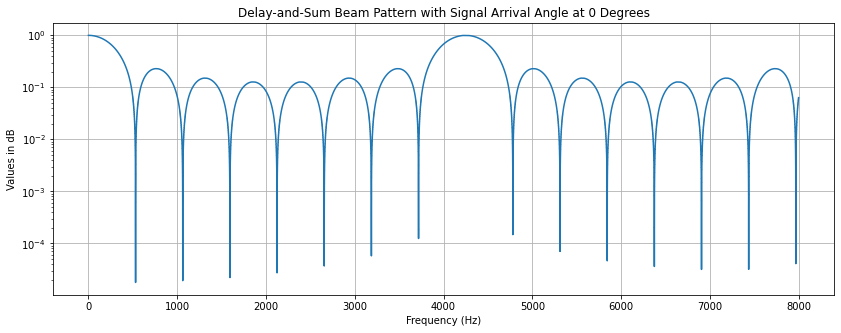

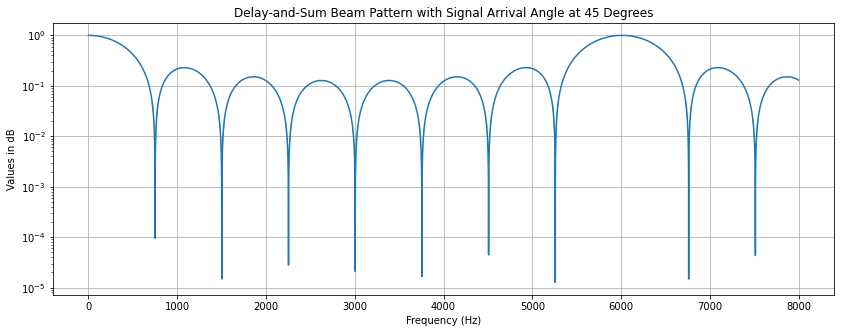

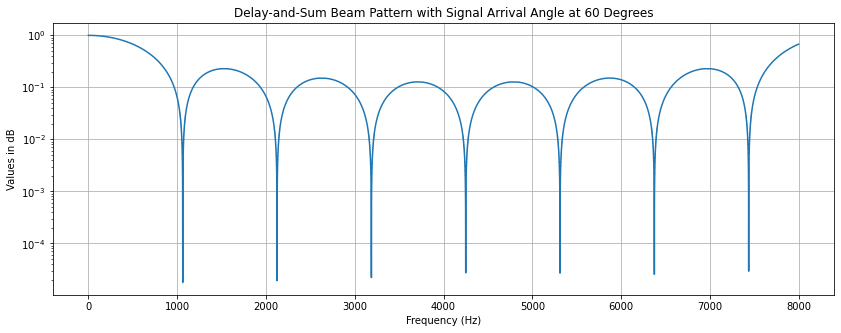

In [12]:
import numpy as np
import scipy as sp
import pywt
import matplotlib.pyplot as plt
import time
from matplotlib import cm
import math

def delay_sum_beam_pattern(mic_number, d, grad_s, freq):
    
    c = 340 #speed of sound in m/s
    w = 2*np.pi*freq
    degrees = np.linspace(0, 180, num=180000)
    grad_radians = np.zeros(len(degrees), dtype = float)
    b_numerator = np.zeros(len(degrees), dtype = float)
    b_denominator = np.zeros(len(degrees), dtype = float)
    B = np.zeros(len(degrees), dtype = float)
    
    for i in range(len(degrees)):
        grad_radians[i] = math.radians(degrees[i])
        b_numerator[i] = math.sin(mic_number * w * d * (math.cos(grad_radians[i]) - math.cos(grad_s)) / (2 * c))
        b_denominator[i] = mic_number * math.sin(w * d * (math.cos(grad_radians[i]) - math.cos(grad_s)) / (2 * c))
        
        B[i] = b_numerator[i] / b_denominator[i]
    
    plt.figure(figsize = (14, 5))
    plt.title('Delay-and-Sum Beam Pattern with '+ str(mic_number)+' Microphones at Distance '+str(d) +'m')
    plt.xlabel('θ(rad)')
    plt.ylabel('Values in dB')
    plt.grid()
    plt.semilogy(grad_radians, abs(B))
    
def delay_sum_beam_pattern2(mic_number, d, grad_s, freq):
    
    c = 340#speed of sound in km/h
    degrees = [0, 45, 60]
    grad_radians = [0, np.pi/4, np.pi/3]
    
    w = np.zeros(len(freq), dtype = int)
    b_numerator = np.zeros([len(grad_radians),len(freq)])
    b_denominator = np.zeros([len(grad_radians),len(freq)])
    B = np.zeros([len(grad_radians),len(freq)])
        
    for i in range(len(grad_radians)):
        for j in range(len(freq)):
            w[j] = 2*np.pi*freq[j]
            b_numerator[i,j] = math.sin(mic_number * w[j] * d * (math.cos(grad_radians[i]) - math.cos(grad_s)) / (2 * c))
            b_denominator[i,j] = mic_number * math.sin(w[j] * d * (math.cos(grad_radians[i]) - math.cos(grad_s)) / (2 * c))
        
            B[i,j] = b_numerator[i,j] / b_denominator[i,j]
            
        plt.figure(figsize = (14, 5))
        plt.title('Delay-and-Sum Beam Pattern with Signal Arrival Angle at '+str(degrees[i]) +' Degrees')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Values in dB')
        plt.grid()
        plt.semilogy(freq, abs(B[i, ]))

#Ερώτημα 1
N = [4, 8, 16]
for i in N:
    d = 0.04
    grad_s = np.pi/2
    freq = 2000
    
    delay_sum_beam_pattern(i, d, grad_s, freq)
    
#Ερώτημα 2
d = [0.04, 0.08, 0.16]
for i in d:
    N = 8
    grad_s = np.pi/2
    freq = 2000
    
    delay_sum_beam_pattern(N, i, grad_s, freq)
    
#Ερώτημα 3
freq = np.linspace(0, 8000, num=800000)
N = 8
d = 0.08

grad_s = np.pi/2
delay_sum_beam_pattern2(N, d, grad_s, freq)
        